# Generate phylogenetic tree

This notebook generates a phylogenetic tree to compare HIV strains BF520 and TRO.11

This analysis is based on one written by Caleb Carr, seen here:
https://github.com/dms-vep/LASV_Josiah_GP_DMS/blob/main/non-pipeline_analyses/LASV_phylogeny_analysis/Notebooks/visualize_reduced_tree.ipynb

Import modules:

In [1]:
import os
import yaml
import ete3
import warnings
# Need this line to render ete3 trees
# https://github.com/etetoolkit/ete/issues/296
os.environ["QT_QPA_PLATFORM"]= "offscreen"
import pandas as pd

long_palette = ['#9F0162', '#009F81', '#FF5AAF', '#8400CD', '#008DF9', '#00C2F9', '#FFB2FD', '#A40122', '#E20134', '#FF6E3A', '#FFC33B', '#00FCCF']

In [2]:
#import treefile
Env_tree = './data/iqt.treefile'

# Map clade to color
clade_to_color = (
    dict(zip(
        ['A', 'B', 'C', 'D', 'F', 'G', 'H', 'J', 'K', 'L'],
        long_palette[1:]
    ))
)

#names_to_annotate = ['A1.KE.1994.BF520.W14M.C2.KX168094', 'B.IT.1995.TRO_11.AY835445', 'B.FR.1983.HXB2-LAI-IIIB-BRU.K03455']
names_to_annotate = ['A1.KE.1994.BF520.W14M.C2.KX168094', 'B.IT.1995.TRO_11.AY835445']
#names_to_annotate = []

name_conversion = {
    'B.FR.1983.HXB2-LAI-IIIB-BRU.K03455': 'HXB2', 
    'A1.KE.1994.BF520.W14M.C2.KX168094': 'BF520',
    'B.IT.1995.TRO_11.AY835445': 'TRO.11',
}

In [3]:
# Function to create and style tree
def get_pretty_protein_tree(treefile, color_mapper, names_to_annotate, name_conversion):
    """
    Function that formats a tree using ete3. This 
    function is modified from Caleb Carr's modification
    of the Equia et al analysis.
    """
    # Create ete3 tree object
    t = ete3.Tree(treefile, format=0)

    # Calculate the midpoint node
    # and set it as tree outgroup
    R = t.get_midpoint_outgroup()
    t.set_outgroup(R)
    # Ladderize tree
    #t.ladderize()
    
    ts = ete3.TreeStyle()
    ts.show_leaf_name = False  # add tip names manually
    ts.scale = 600
    #ts.branch_vertical_margin = 2
    ts.mode = "c"
    # ts.arc_start = -180 # 0 degrees = 3 o'clock
    #ts.arc_span = 350
    #t.unroot()
    ts.root_opening_factor=1
    
    # Style and annotate each leaf
    for n in t.traverse():
        nstyle = ete3.NodeStyle()
        nstyle["hz_line_width"] = 1
        nstyle["vt_line_width"] = 1
        nstyle["hz_line_color"] = "black"
        nstyle["vt_line_color"] = "black"
        if n.is_leaf():
            nstyle["fgcolor"] = color_mapper[n.name[0]]
            if n.name in names_to_annotate:
                nstyle["size"] = 10
                nstyle["shape"] = "square"
            else:
                nstyle["size"] = 6
            if n.name in names_to_annotate:
                n.add_face(ete3.TextFace(f" {name_conversion[n.name]}",
                                         ftype="Sans-serif",
                                         tight_text=True,
                                         fsize=10,
                                         fgcolor='#000000',
                                         ),
                           column=0,
                           position="branch-right")
        else:
            nstyle["size"] = 0
        n.set_style(nstyle)

    # Add legend
    for category, color in color_mapper.items():
        # Marker
        marker = ete3.CircleFace(5, color=color)
        marker.margin_bottom = 1
        marker.margin_right = 8
        ts.legend.add_face(marker, column=0)
        # Text
        text = ete3.TextFace(category, ftype="Arial", fsize=10)
        text.margin_bottom = 1
        ts.legend.add_face(text, column=1)
    ts.legend_position = 2
        
    # Add scale bar but can't edit text
    # scale bar: https://github.com/etetoolkit/ete/issues/266
    ts.show_scale = True
    ts.scale_length = 0.05
         
    return t, ts

In [4]:
# generate the phylogeny
t, ts = get_pretty_protein_tree(Env_tree, clade_to_color, names_to_annotate, name_conversion)

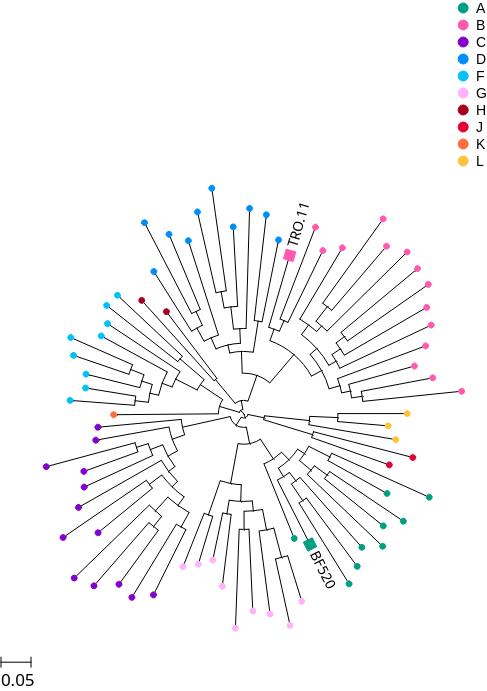

In [5]:
display(
    t.render(
        "%%inline", 
        tree_style=ts,
        dpi=300,
    )
)

In [6]:
# Make output dir if doesn't exist
if not os.path.exists('./results/trees/'):
    os.mkdir('./results/trees/')

# Render image
t.render(
    './results/trees/Env_phylogeny.svg', 
    tree_style=ts,
    dpi=300,
)

{'nodes': [[403.7192342454031,
   240.09138995828494,
   410.7192342454031,
   247.09138995828494,
   5,
   None],
  [384.3979934489358,
   252.08000993941414,
   391.96491210362854,
   259.6469285941069,
   6,
   None],
  [391.7850412721651,
   265.580713027342,
   399.86466104574214,
   273.66033280091904,
   7,
   None],
  [408.5763334740087,
   283.26615673542045,
   417.11076328895456,
   291.80058655036623,
   9,
   None],
  [384.8316220003362,
   290.4533718983594,
   393.7597120313107,
   299.3814619293339,
   10,
   None],
  [424.5728304332668,
   322.6001889098259,
   433.830610250159,
   331.8579687267181,
   17,
   None],
  [382.2625869508437,
   318.6905056678686,
   391.7837238716685,
   328.21164258869334,
   18,
   None],
  [398.46595685315674,
   346.30995867317665,
   408.18223122266215,
   356.02623304268207,
   21,
   None],
  [378.341499230889,
   351.0122618169239,
   388.18329321946794,
   360.8540558055028,
   22,
   None],
  [377.6909225935786,
   371.344507877